# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spellchecker import SpellChecker
from gensim.models import Word2Vec
import re
import nltk
import contractions
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Bidirectional
import numpy as np
import spacy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import seaborn as sns

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

2024-10-08 21:17:26.029767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Reading the file and converting it to a DataFrame
def read_file_to_dataframe(filename):
    data = []
    
    with open("./data/" + filename, 'r', encoding='utf-8') as file:
        for linha in file:
            linha = linha.strip()  # Remove leading/trailing spaces and newlines
            filme = linha.split('\t')  # Split by tab
            data.append(filme)  # Append the row to the data list
    
    # Convert the list of rows to a pandas DataFrame
    df = pd.DataFrame(data)
    
    return df


# Variaveis onde está os ficheiros de treino e o modelo

In [3]:
#file onde já está o modelo treinado"
model=None
newPKL = "joao3"


#limpesa de ficheiro de treino
data="train"
#ficheiro onde vai ser feita ao autoavaliacao
avaliation = "test_no_labels"

In [4]:
print("\033[34mData to DataFrame\n\033[0m")
# Example usage
df = read_file_to_dataframe(data+".txt")
print(df)

Data to DataFrame

                              0          1        2                        3  \
0                  Ela Cheppanu     Telugu  romance                   Ramana   
1     A Nightmare on Elm Street   American   horror             Samuel Bayer   
2               American Gothic   American   horror               John Hough   
3                          Gang  Bollywood    crime              Mazhar Khan   
4            Intimate Relations    British    drama            Charles Frank   
...                         ...        ...      ...                      ...   
8036              Sa 'Yo Lamang   Filipino    drama          Laurice Guillen   
8037          The Lemon Sisters   American    drama             Joyce Chopra   
8038      Dil Ne Phir Yaad Kiya  Bollywood  romance                  Unknown   
8039  Rehnaa Hai Terre Dil Mein  Bollywood  romance            Gautham Menon   
8040             Things to Come    British   sci-fi  William Cameron Menzies   

                    

8041
Average word count: 370.33


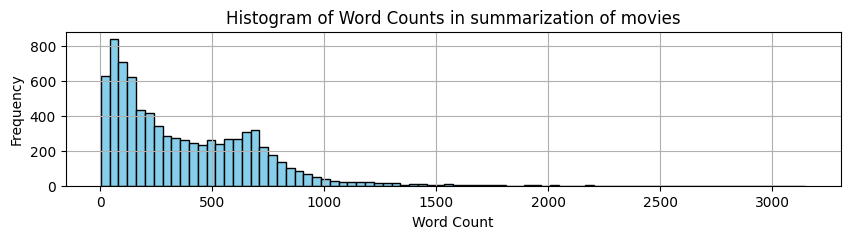

In [5]:
# histogram of word count
print(len(df))

df['word_count'] = df[4].apply(lambda x: len(x.split()))
avg_word_count = df['word_count'].mean()
print(f'Average word count: {avg_word_count:.2f}')
# Plotting the histogram of word counts
plt.figure(figsize=(10, 2))
plt.hist(df['word_count'], bins=80, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in summarization of movies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


the: 161014
to: 111607
and: 106034
a: 80092
of: 53504
is: 49072
his: 43843
in: 43811
he: 30869
that: 30744


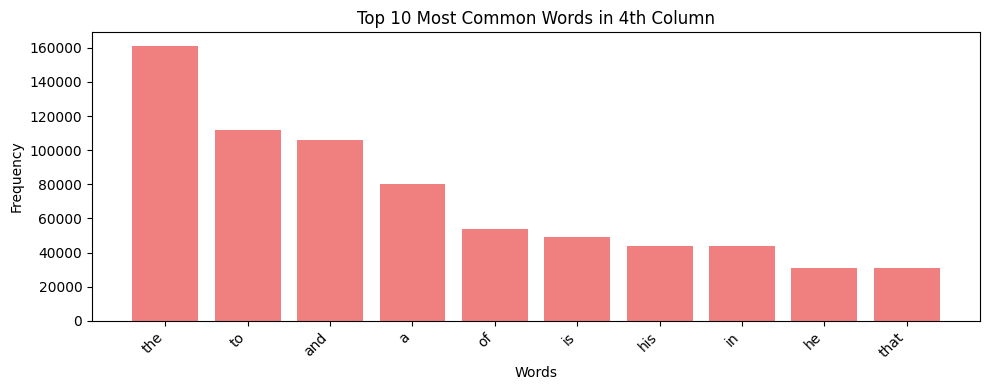

In [6]:
# Flatten all words from the 4th column into a single list
all_words = [word for row in df[4] for word in row.split()]

word_counter = Counter(all_words)

top_10_words = word_counter.most_common(10)

for word, count in top_10_words:
    print(f"{word}: {count}")

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 4))
plt.bar(words, counts, color='lightcoral')
plt.title('Top 10 Most Common Words in 4th Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate word labels for better readability
plt.tight_layout()
plt.show()

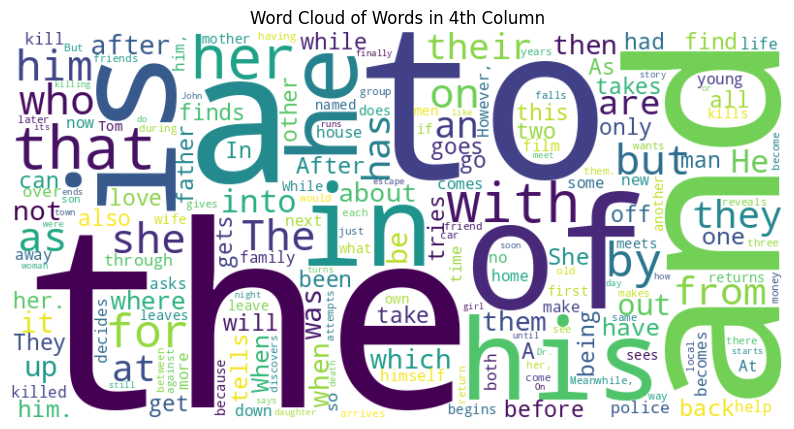

In [7]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Words in 4th Column')
plt.show()

In [8]:
# Check for typos using the pyspellchecker
spell = SpellChecker()
misspelled_words = spell.unknown(all_words)  # Identify misspelled words

# Display the number of potential typos
print(f"Number of potential typos: {len(misspelled_words)}")

# Optionally, print the misspelled words
print("\nPotential typos detected:")
for word in misspelled_words:
    print(word)

Number of potential typos: 110045

Potential typos detected:
dreyfoos
white.
yi's
pismo
36-year-old
tess.
petrie
inquiry.
minions.
anamika.
steamship,
anywhere.
shooting;
affected.
schuyler.
deja
cache.
chinna's
magazine,[6]
good-humored
citadel.
ned,
afghanistan-pakistan
drona.
horrors,
steel.
odell
toh
(connected
neville's
cleopas
paiute
poongayi
hardships.
combes),
mangus
harford).
scattered,
banner),
maclaine,
busy,
tarun,
flew,
charanya
missouri.
spiller,
(seema),
atteron
expect.
fold-sphere
sivanna,
zimmerman;
diet,
outer-space,
naoya
kelvin,
bahamas.
steed,
reddish-orange
brent's
archimedes
expected:
мојa
cronut
absolved.
co-leaders.
sub-electron
bryant
lorenzo,
lam)
(arunoday
hubbell's
abdulla
playpals
feel;
(sanjib
bills:
brookview
bawa),
cleaned.
spandana).
mantell's
delivered.
pursued;
(sandeep).
goblins,
tatum)
sunrise,
one-man
belgium,
“why
opening-day
tangles.
saber-toothed
scales)
scatter.
7-foot
sher)
ethernet
sarah-creature
football.
(ida
kaleb,
equation.
'riot
trouble

## Pre Processamento

In [12]:
# Function to standardize dates
def standardize_dates(text):
    def _month_to_number(month_name):
        try:
            return datetime.strptime(month_name, "%b").month  # Abbreviated month names (e.g., "Feb")
        except ValueError:
            try:
                return datetime.strptime(month_name, "%B").month  # Full month names (e.g., "February")
            except ValueError:
                return None  # Return None for invalid month names

    def _handle_two_digit_year(year):
        if not year:  # If year is None or empty
            return ""
        year = int(year)
        return year + 2000 if year < 100 else year

    # Date normalization using regex
    text = re.sub(
        r'(\b[A-Za-z]+) (\d{1,2})(?:st|nd|rd|th)?(?:,)? (\d{4})?',
        lambda match: (
            f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}/{match.group(3)}"
            if _month_to_number(match.group(1)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}"
            if _month_to_number(match.group(1)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    # Handle formats like "8-Feb-2013"
    text = re.sub(
        r'(\d{1,2})(?:st|nd|rd|th)?[-/.](\b[A-Za-z]+)\b[-/.]?(\d{2,4})?',
        lambda match: (
            f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}/{_handle_two_digit_year(match.group(3))}"
            if _month_to_number(match.group(2)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}"
            if _month_to_number(match.group(2)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    return text

In [ ]:
# lowercasing
def lowercase_text(text):
    return text.lower()

In [ ]:
# stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(text, stop_words=stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower()]
    return " ".join(filtered_words)

In [ ]:
#contractions
def expand_contractions(text):
    if not isinstance(text, str) or not text:
        # Return an empty string or the original text if it's not a valid string
        return text

    try:
        # Use contractions.fix to expand contractions in the text
        return contractions.fix(text)
    except IndexError as e:
        print(f"IndexError encountered: {e}")
        # Optionally return the original text if there's an error
        return text


In [ ]:
# Remove punctuation except for specific cases like "Dr." or "Mr."
def remove_punctuation(text):
    # Replace specific abbreviations with placeholders
    text = re.sub(r'\b(Dr|Mr|Ms|Mrs)\.', r'\1_PLACEHOLDER_', text)
    
    # Remove all punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Restore the abbreviations
    text = text.replace('_PLACEHOLDER_', '.')
    
    return text

In [ ]:
print("\033[34mPre Processing the data\n\033[0m")
def preprocess_text(text):
    text = expand_contractions(text)       # Step 1: Expand contractions
    text = standardize_dates(text)         # Step 2: Normalize dates
    text = lowercase_text(text)            # Step 3: Convert to lowercase
    text = remove_punctuation(text)        # Step 4: Remove punctuation but keep specific cases
    text = remove_stopwords(text)          # Step 5: Remove stopwords
    return text

# Example usage

df.iloc[:, 4] = df.iloc[:, 4].apply(preprocess_text)

print("\033[32mPre Processing Completed!\n\033[0m")

## Carregar o modelo ou Criar um novo
#### Conforme o nome dado a variavel 'newPKL'

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical
from wikipedia2vec import Wikipedia2Vec

# Use the Wikipedia2Vec load method instead of pickle
wiki2vec = Wikipedia2Vec.load("data/enwiki_20180420_win10_300d.pkl")

/home/joaocosta/miniconda3/envs/LN/lib/python3.10/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[769702 380730]
 [649936 302186]
 [869658 382059]
 ...
 [     0      0]
 [     0      0]
 [     0      0]] loaded from the file data/enwiki_20180420_win10_300d.pkl is not byte aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.0. See https://github.com/joblib/joblib/issues/563 for more details
  warnings.warn(message)
/home/joaocosta/miniconda3/envs/LN/lib/python3.10/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[262 221]
 [132 108]
 [124 104]
 ...
 [  0   0]
 [  0   0]
 [  0   0]] loaded from the file data/enwiki_20180420_win10_300d.pkl is not byte aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, rege

In [10]:
# Parameters
MAX_SEQUENCE_LENGTH = 207  # Maximum length of the movie plot sequences
EMBEDDING_DIM = 300  # Dimension of Wikipedia2Vec embeddings
NUM_GENRES = 9  # Number of genres to predict

# Step 1: Split the data first before preprocessing
X = df.iloc[:, 4]  # Movie plots
y = df.iloc[:, 2]  # Genres (labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Encode the genres
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert to numerical labels
y_test_encoded = label_encoder.transform(y_test)  # Convert to numerical labels for test data

# Step 3: Preprocess training data (Tokenization and padding)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # Fit tokenizer only on training data
word_index = tokenizer.word_index  # Dictionary mapping words to their token ids

# Convert movie plots to padded sequences for both train and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

# Step 4: Convert genres to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train_encoded, num_classes=NUM_GENRES)
y_test_cat = to_categorical(y_test_encoded, num_classes=NUM_GENRES)

# Step 5: Create the embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = wiki2vec.get_word_vector(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    except KeyError:
        # Word not in Wikipedia2Vec model
        pass

# Step 6: Build the LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))  # Pretrained embeddings, not trainable
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_GENRES, activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Step 8: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 9: Predict genres for the test data
y_pred = model.predict(X_test_pad)

# Convert predictions and true values from one-hot to label encoding
y_test_labels = np.argmax(y_test_cat, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Step 10: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

2024-10-08 21:17:45.024068: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
161/161 [==============================] - 138s 838ms/step - loss: 1.9280 - accuracy: 0.2690 - val_loss: 1.6042 - val_accuracy: 0.4110
Epoch 2/10
161/161 [==============================] - 151s 937ms/step - loss: 1.6893 - accuracy: 0.3835 - val_loss: 1.5479 - val_accuracy: 0.4452
Epoch 3/10
161/161 [==============================] - 138s 856ms/step - loss: 1.5405 - accuracy: 0.4400 - val_loss: 1.6333 - val_accuracy: 0.3947
Epoch 4/10
161/161 [==============================] - 160s 996ms/step - loss: 1.5043 - accuracy: 0.4651 - val_loss: 1.3912 - val_accuracy: 0.5074
Epoch 5/10
161/161 [==============================] - 157s 975ms/step - loss: 1.3914 - accuracy: 0.4879 - val_loss: 1.3231 - val_accuracy: 0.5144
Epoch 6/10
161/161 [==============================] - 152s 943ms/step - loss: 1.2685 - accuracy: 0.5353 - val_loss: 1.2458 - val_accuracy: 0.5462
Epoch 7/10
161/161 [==============================] - 146s 909ms/step - loss: 1.0891 - accuracy: 0.6064 - val_loss: 1.6237 -

In [11]:
# Step 6: Build the LSTM model

modelbi = Sequential()
modelbi.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))  # Pretrained embeddings, not trainable
modelbi.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
modelbi.add(Dense(64, activation='relu'))
modelbi.add(Dense(NUM_GENRES, activation='softmax'))  # Softmax for multi-class classification

# Compile the modelbi
modelbi.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 7: Train the modelbi
historybi = modelbi.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Step 8: Evaluate the modelbi on test data
test_lossbi, test_accuracybi = modelbi.evaluate(X_test_pad, y_test_cat)
print(f"Test Loss: {test_lossbi}")
print(f"Test Accuracy: {test_accuracybi}")

# Step 9: Predict genres for the test data
y_predbi = modelbi.predict(X_test_pad)

# Convert predictions and true values from one-hot to label encoding
y_test_labelsbi = np.argmax(y_test_cat, axis=1)
y_pred_labelsbi = np.argmax(y_predbi, axis=1)

# Step 10: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_labelsbi, y_pred_labelsbi)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/10
161/161 [==============================] - 287s 2s/step - loss: 1.9325 - accuracy: 0.2672 - val_loss: 1.6440 - val_accuracy: 0.4134
Epoch 2/10
161/161 [==============================] - 294s 2s/step - loss: 1.5977 - accuracy: 0.4019 - val_loss: 1.5496 - val_accuracy: 0.4180
Epoch 3/10
161/161 [==============================] - 297s 2s/step - loss: 1.4749 - accuracy: 0.4624 - val_loss: 1.3642 - val_accuracy: 0.4988
Epoch 4/10
161/161 [==============================] - 304s 2s/step - loss: 1.4599 - accuracy: 0.4639 - val_loss: 1.4539 - val_accuracy: 0.4600
Epoch 5/10
161/161 [==============================] - 280s 2s/step - loss: 1.3557 - accuracy: 0.5071 - val_loss: 1.3659 - val_accuracy: 0.5105
Epoch 6/10
161/161 [==============================] - 297s 2s/step - loss: 1.1874 - accuracy: 0.5755 - val_loss: 1.2798 - val_accuracy: 0.5253
Epoch 7/10
161/161 [==============================] - 346s 2s/step - loss: 1.0646 - accuracy: 0.6138 - val_loss: 1.1363 - val_accuracy: 0.5897

Accuracy: 0.6184
Precision: 0.6420
Recall: 0.6184
F1 Score: 0.6222


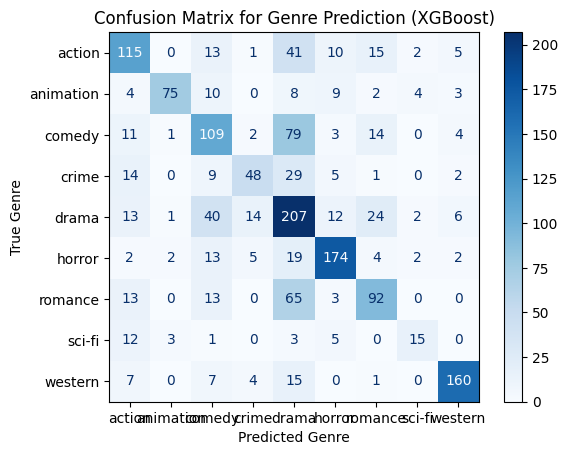


Classification Report:
               precision    recall  f1-score   support

      action       0.60      0.57      0.59       202
   animation       0.91      0.65      0.76       115
      comedy       0.51      0.49      0.50       223
       crime       0.65      0.44      0.53       108
       drama       0.44      0.65      0.53       319
      horror       0.79      0.78      0.78       223
     romance       0.60      0.49      0.54       186
      sci-fi       0.60      0.38      0.47        39
     western       0.88      0.82      0.85       194

    accuracy                           0.62      1609
   macro avg       0.66      0.59      0.62      1609
weighted avg       0.64      0.62      0.62      1609



In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Assuming the Wikipedia2Vec model is loaded as 'wiki2vec'
# and tokenizer is already fit on the training data.

# Step 1: Tokenize plots for train and test sets
tokenized_plots_train = tokenizer.texts_to_sequences(X_train)
tokenized_plots_test = tokenizer.texts_to_sequences(X_test)

# Step 2: Generate plot-level embeddings by averaging Wikipedia2Vec word embeddings
def get_average_embedding(sequences, word2vec_model, embedding_dim):
    averaged_embeddings = []
    for sequence in sequences:
        word_vectors = []
        for token in sequence:
            word = tokenizer.index_word.get(token)  # Get the word from the token
            if word:
                try:
                    embedding_vector = word2vec_model.get_word_vector(word)
                    word_vectors.append(embedding_vector)
                except KeyError:
                    # Word not found in Wikipedia2Vec model, skip it
                    pass
        if word_vectors:
            averaged_embeddings.append(np.mean(word_vectors, axis=0))
        else:
            averaged_embeddings.append(np.zeros(embedding_dim))  # Fallback to zero vector if no valid embeddings
    return np.array(averaged_embeddings)

# Convert tokenized sequences into Wikipedia2Vec embeddings
train_embeddings = get_average_embedding(tokenized_plots_train, wiki2vec, EMBEDDING_DIM)
test_embeddings = get_average_embedding(tokenized_plots_test, wiki2vec, EMBEDDING_DIM)

# Ensure no NaN values in embeddings (just in case)
train_embeddings = np.nan_to_num(train_embeddings, nan=0.0, posinf=0.0, neginf=0.0)
test_embeddings = np.nan_to_num(test_embeddings, nan=0.0, posinf=0.0, neginf=0.0)

# Step 3: Train an XGBoost classifier on the averaged Wikipedia2Vec embeddings
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(train_embeddings, y_train_encoded)

# Step 4: Make predictions on the test set
y_pred = xgb_model.predict(test_embeddings)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Genre Prediction (XGBoost)")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.show()

# Step 7: Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.6619
Precision: 0.6790
Recall: 0.6619
F1 Score: 0.6609


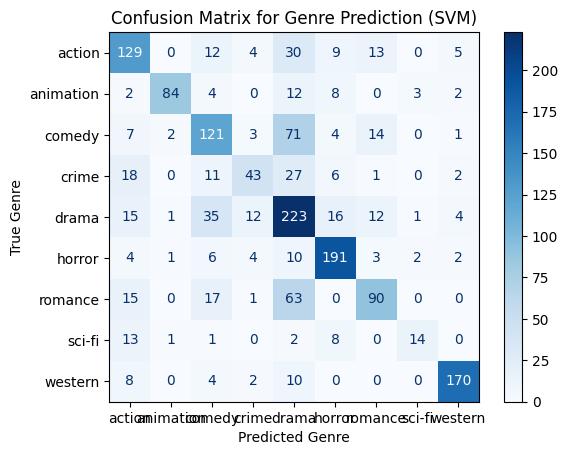


Classification Report:
               precision    recall  f1-score   support

      action       0.61      0.64      0.62       202
   animation       0.94      0.73      0.82       115
      comedy       0.57      0.54      0.56       223
       crime       0.62      0.40      0.49       108
       drama       0.50      0.70      0.58       319
      horror       0.79      0.86      0.82       223
     romance       0.68      0.48      0.56       186
      sci-fi       0.70      0.36      0.47        39
     western       0.91      0.88      0.89       194

    accuracy                           0.66      1609
   macro avg       0.70      0.62      0.65      1609
weighted avg       0.68      0.66      0.66      1609



In [14]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Tokenize plots for train and test sets
tokenized_plots_train = tokenizer.texts_to_sequences(X_train)
tokenized_plots_test = tokenizer.texts_to_sequences(X_test)

# Step 2: Generate plot-level embeddings by averaging Wikipedia2Vec word embeddings
def get_average_embedding(sequences, word2vec_model, embedding_dim):
    averaged_embeddings = []
    for sequence in sequences:
        word_vectors = []
        for token in sequence:
            word = tokenizer.index_word.get(token)  # Get the word from the token
            if word:
                try:
                    embedding_vector = word2vec_model.get_word_vector(word)
                    word_vectors.append(embedding_vector)
                except KeyError:
                    # Word not found in Wikipedia2Vec model, skip it
                    pass
        if word_vectors:
            averaged_embeddings.append(np.mean(word_vectors, axis=0))
        else:
            averaged_embeddings.append(np.zeros(embedding_dim))  # Fallback to zero vector if no valid embeddings
    return np.array(averaged_embeddings)

# Convert tokenized sequences into Wikipedia2Vec embeddings
train_embeddings = get_average_embedding(tokenized_plots_train, wiki2vec, EMBEDDING_DIM)
test_embeddings = get_average_embedding(tokenized_plots_test, wiki2vec, EMBEDDING_DIM)

# Ensure no NaN values in embeddings (just in case)
train_embeddings = np.nan_to_num(train_embeddings, nan=0.0, posinf=0.0, neginf=0.0)
test_embeddings = np.nan_to_num(test_embeddings, nan=0.0, posinf=0.0, neginf=0.0)

# Step 3: Train an SVM classifier on the averaged Wikipedia2Vec embeddings
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(train_embeddings, y_train_encoded)

# Step 4: Make predictions on the test set
y_pred = svm_model.predict(test_embeddings)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Genre Prediction (SVM)")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.show()

# Step 7: Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))